# Lab 3: Minimizing Cost

Author: Seungjae Lee (이승재)

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Theoretical Overview

$$ H(x) = Wx $$

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

 - $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
 - $cost(W)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

Note that it is simplified, without the bias $b$ added to $H(x)$.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

## Data

We will use fake data for this example.

기본적으로 PyTorch는 NCHW 형태이다.

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

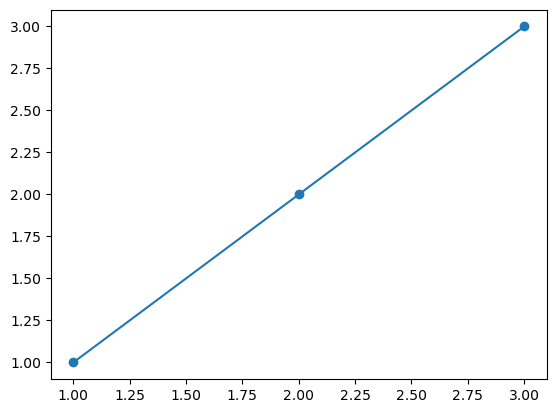

In [4]:
# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000) # 1부터 3까지 1000등분
plt.plot(xs, xs)

In [6]:
print(xs)
print(xs.shape)

[1.         1.002002   1.004004   1.00600601 1.00800801 1.01001001
 1.01201201 1.01401401 1.01601602 1.01801802 1.02002002 1.02202202
 1.02402402 1.02602603 1.02802803 1.03003003 1.03203203 1.03403403
 1.03603604 1.03803804 1.04004004 1.04204204 1.04404404 1.04604605
 1.04804805 1.05005005 1.05205205 1.05405405 1.05605606 1.05805806
 1.06006006 1.06206206 1.06406406 1.06606607 1.06806807 1.07007007
 1.07207207 1.07407407 1.07607608 1.07807808 1.08008008 1.08208208
 1.08408408 1.08608609 1.08808809 1.09009009 1.09209209 1.09409409
 1.0960961  1.0980981  1.1001001  1.1021021  1.1041041  1.10610611
 1.10810811 1.11011011 1.11211211 1.11411411 1.11611612 1.11811812
 1.12012012 1.12212212 1.12412412 1.12612613 1.12812813 1.13013013
 1.13213213 1.13413413 1.13613614 1.13813814 1.14014014 1.14214214
 1.14414414 1.14614615 1.14814815 1.15015015 1.15215215 1.15415415
 1.15615616 1.15815816 1.16016016 1.16216216 1.16416416 1.16616617
 1.16816817 1.17017017 1.17217217 1.17417417 1.17617618 1.1781

## Cost by W

$$ H(x) = Wx $$

In [8]:
W_l = np.linspace(-5, 7, 1000)
cost_l = []

print(cost_l)

[]


In [9]:
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost_l.append(cost.item()) # tensor 변수에서 값만 가져오기

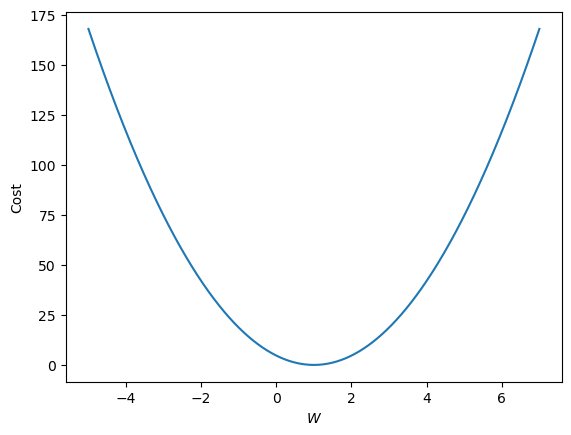

In [6]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$') # 기울이기
plt.ylabel('Cost')
plt.show()

## Gradient Descent by Hand

In [13]:
W = 0

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$

In [14]:
gradient = torch.sum((W * x_train - y_train) * x_train)
print(gradient)

tensor(-14.)


$$ W := W - \alpha \nabla W $$

In [15]:
lr = 0.1
W -= lr * gradient
print(W)

tensor(1.4000)


## Training

In [13]:
# 데이터
x_train = torch.FloatTensor(torch.rand(30000,1))
y_train = torch.FloatTensor(torch.rand(30000,1))
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train) # .backward()

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient # .step()

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 0.467, Cost: 1.327407
Epoch    2/10 W: 0.716, Cost: 0.377574
Epoch    3/10 W: 0.848, Cost: 0.107399
Epoch    4/10 W: 0.919, Cost: 0.030549
Epoch    5/10 W: 0.957, Cost: 0.008689
Epoch    6/10 W: 0.977, Cost: 0.002472
Epoch    7/10 W: 0.988, Cost: 0.000703
Epoch    8/10 W: 0.993, Cost: 0.000200
Epoch    9/10 W: 0.997, Cost: 0.000057
Epoch   10/10 W: 0.998, Cost: 0.000016


## Training with `optim`

In [29]:
# # 데이터
# x_train = torch.FloatTensor(torch.rand(30000,1))
# y_train = torch.FloatTensor(torch.rand(30000,1))
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000 Cost: 4.666667
Epoch    1/10 W: 1.400 Cost: 0.746667
Epoch    2/10 W: 0.840 Cost: 0.119467
Epoch    3/10 W: 1.064 Cost: 0.019115
Epoch    4/10 W: 0.974 Cost: 0.003058
Epoch    5/10 W: 1.010 Cost: 0.000489
Epoch    6/10 W: 0.996 Cost: 0.000078
Epoch    7/10 W: 1.002 Cost: 0.000013
Epoch    8/10 W: 0.999 Cost: 0.000002
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000


In [28]:

# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = 2*torch.mean((W * x_train - y_train) * x_train)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 0.336504
Epoch    1/10 W: 0.050, Cost: 0.312293
Epoch    2/10 W: 0.097, Cost: 0.291177
Epoch    3/10 W: 0.140, Cost: 0.272762
Epoch    4/10 W: 0.181, Cost: 0.256702
Epoch    5/10 W: 0.219, Cost: 0.242695
Epoch    6/10 W: 0.255, Cost: 0.230479
Epoch    7/10 W: 0.288, Cost: 0.219825
Epoch    8/10 W: 0.319, Cost: 0.210533
Epoch    9/10 W: 0.348, Cost: 0.202430
Epoch   10/10 W: 0.375, Cost: 0.195363


In [ ]:
# optimizer = optim.SGD([W,b], lr=0.01)

# optimizer.zero_grad() # gradient 초기화
# cost.backward() # gradient 계산
# optimizer.step() # 개선된 gradient의 방향대로 W, b 개선
